# Exam number: Y3866693

## 1. Linear regression and regularisation

Importing libraries used to apply regression:

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

Preliminaries: 
- Fetching the data from the .csv 
- Setting data size
- Setting complexity parameters

In [14]:
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

X = data[:, 0:4]                                                               # Selects all the rows from X1 to X5
y = data[:, 5]                                                                 # Selects all the rows from Y
train_size = 70
alphas = np.logspace(-5, 5, 100)

# Training data
X_training = X[:70]
y_training = y[:70]

# Testing data
X_testing = X[70:]
y_testing = y[70:]

Applying the three types of regression to the data, training each model:

In [50]:
model = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression:', 'ridge regression using CV:', 'lasso regression using CV:'


for i, model in enumerate(model):
    print('Applying', model_names[i])
    if model == LinearRegression:                                             
        regr = model()
    else:
#       print('Trying these complexity parameters:', alphas), Commenting out as it causes clutter, but useful to see                  
        regr = model(alphas=alphas)
        
    regr.fit(X_training, y_training)

    if model != LinearRegression:
#       print('Using cross validation, got this value for complexity parameter', regr.alpha_), Creates clutter but useful
        print('Coefficients are:', regr.coef_)
    
    # Written to save trained model of RidgeCV as it is my chosen method
    if model == RidgeCV:
        RidgeTrained = regr
        
    print('R2 value is:', regr.score(X_testing, y_testing))
    print('\n')

Applying linear regression:
R2 value is: 0.9886715393312371


Applying ridge regression using CV:
Coefficients are: [-0.0010788  -0.41532472  0.35209602  0.55216808]
R2 value is: 0.988938701623674


Applying lasso regression using CV:
Coefficients are: [-0.00107725 -0.41542018  0.35211927  0.55223474]
R2 value is: 0.9889255286095754




Overfitting is something to consider as we want to avoid this as the model will have low accuracy, and we want to maximise R2.
To avoid the risk of overfitting we must use cross validation (CV), therefore we will either choose ridge or lasso regression.

I choose ridge over lasso. This is because lasso uses absolute values, eliminating coefficients whereas ridge just minimises them. This minimisation gives us a more accurate model as it does not completely disregard certain coefficients.

Applying ridge regression to the unseen data:

In [18]:
unseenData = np.loadtxt('unseendata.csv', delimiter=',', skiprows=1)

X_unseen = unseenData[:, 0:4]
y_unseen = unseenData[:, 5]

print('R2 value for unseen data: ', RidgeTrained.score(X_unseen, y_unseen))

R2 value for unseen data:  0.9975733077224966


## 2. Descriptive statistics, data visualisation and PCA

Importing libraries:

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA

Contour plotting:


Gene 1:


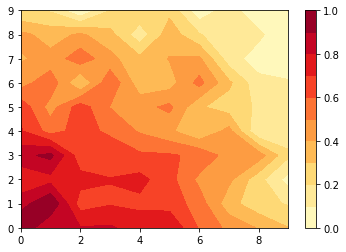


Gene 2:


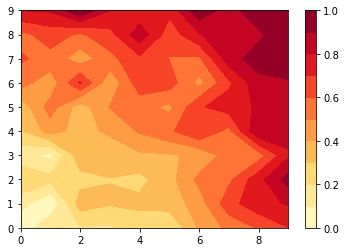


Gene 3:


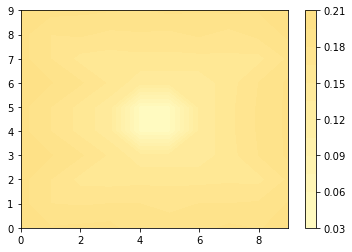


Gene 4:


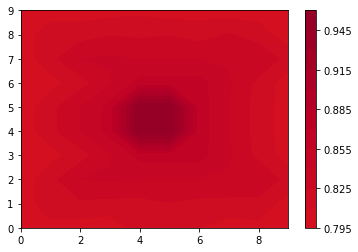


Gene 5:


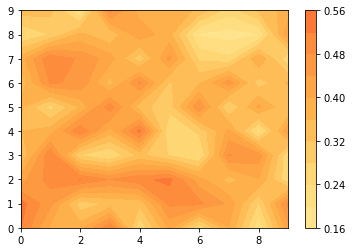


Gene 6:


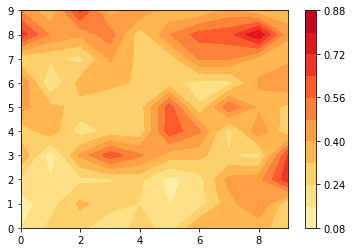


Gene 7:


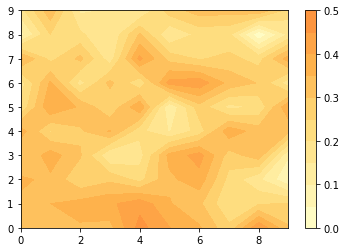

In [21]:
gene_data = np.loadtxt('sqisland.csv', delimiter=',', skiprows=1)

x = gene_data[:, 0]
y = gene_data[:, 1]
z = gene_data[:, 2:]

x, y = np.meshgrid(range(0, 10), range(9, -1, -1))

for i in range(np.shape(z)[1]):
    Z = np.flipud(np.reshape(z[:, i], (10, 10)))
    plt.contourf(x, y, Z, levels = 10, vmin = 0, vmax = 1, cmap='YlOrRd')
    plt.colorbar()
    print('\nGene ' + str(i + 1) + ':')
    plt.show()

In Locus 1 (hunter/gatherers): Gene 2 is the more common allele, as there are more red areas on the contour plot for Gene 2 than there are for Gene 1 - Gene 2 is more frequent. There are also less red areas on the contour plot for Gene 1, which means Gene 1 is less frequent.

In Locus 2 (farmers): Gene 3 is more common as it has a larger frequency value overall as it covers the whole island apart from the centre (shown by the dark yellow), whereas Gene 4 is only concentrated at the centre (shown by the dark red spot).

Among seafarers, the most common allele is Gene 6, while the least common is Gene 7. This is because Gene 6 is more frequent, shown by the red areas on the contour plot - also on the colour bar on the side, you can see it has higher values in general. Gene 7's plot on the other hand has low values on the colour bar, and has a lot of lighter areas.

Gene 5 is in the middle, as while its contour plot does have a few light yellow areas - it has more orange areas than the plot of Gene 7 and slightly higher colour bar values. It is nowhere near as frequent as Gene 6, due to the obvious lack of red areas and lower values on the colour bar.

Calculating variance of each of the 7 gene attributes:

In [51]:
varianceAppend = []

for i in range(np.shape(z)[1]):
        variance = np.var(z[:, i])
        varianceAppend.append(variance)
        
        print('Gene ' + str(i + 1) + ' variance = ' + str(variance))

Gene 1 variance = 0.060582434371
Gene 2 variance = 0.06058243437099999
Gene 3 variance = 0.0010836736
Gene 4 variance = 0.0010836735999999985
Gene 5 variance = 0.009514104445105358
Gene 6 variance = 0.020771410865005658
Gene 7 variance = 0.009074831617783594


Pearson correlation between Gene 1 and Gene 4, and Gene 1 and Gene 5:

In [36]:
print('The format is (Pearson correlation, p-value)')
print('\n')
print(sp.stats.pearsonr(z[:, 0], z[:, 3]))
print(sp.stats.pearsonr(z[:, 0], z[:, 4]))

The format is (Pearson correlation, p-value)


(0.07526456660171585, 0.4567315550997607)
(0.3601203240798584, 0.00023304482007153996)


Between Gene 1 and Gene 4, there is almost no correlation and a p-value of 0.45. This means that there is an almost 50/50 chance that Gene 1 is mutually exclusive to Gene 4, but you cannot reject it as the p-value > 0.05.

Between Gene 1 and Gene 5, there is a weak positive correlation but an extremely low p-value. So you can reject the hypothesis of non-correlation at the 95% significance level as the p-value < 0.05. 

It seems Gene 1 may have been carried by the farmers. It does prove my point as if there is no correlation between Gene 1 and Gene 4, there must be a strong correlation between Gene 1 and Gene 3. Therefore showing Gene 3 is more prevalent in the population, which is what I predicted.


Applying PCA to the data, transforming the data and displaying variance for each:

In [54]:
pca = PCA(n_components = 7)
transformedData = pca.fit_transform(z)

varianceAppendTransformed = []

for i in range(7):
    varianceAppendTransformed.append(np.var(pca.components_[i]))
    print('Transformed gene', i + 1, 'variance:', varianceAppendTransformed[i])

Transformed gene 1 variance: 0.14285714285714296
Transformed gene 2 variance: 0.142857142857143
Transformed gene 3 variance: 0.14285714285714288
Transformed gene 4 variance: 0.14285714285714285
Transformed gene 5 variance: 0.08163265498413076
Transformed gene 6 variance: 0.06183954674810744
Transformed gene 7 variance: 0.14224208398204763


Sum of variance before PCA, and sum of variance after PCA:

In [34]:
print('Sum of variance:', sum(varianceAppend))
print('Sum of variance after transformation:', sum(varianceAppendTransformed))

Sum of variance: 0.16269256286989464
Sum of variance after transformation: 0.8571428571428574


Yes these results are expected. This is because the gene data are small, hence why the variance is also small. However, the data had been transformed (in this case increased) in order to fit into the square shape, therefore the variance had increased, therefore the sum had been increased.

Plotting the first two PCA components:

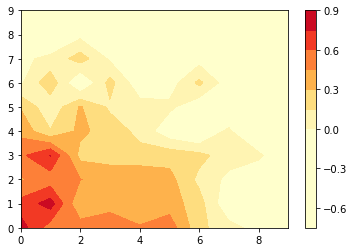

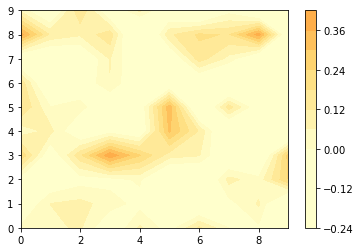

In [37]:
for i in range(2):
    Z = np.flipud(np.reshape(transformedData[:, i], (10, 10)))
    plt.contourf(x, y, Z, levels = 10, vmin = 0, vmax = 1, cmap='YlOrRd')
    plt.colorbar()
    plt.show()

The first contour is almost similar to Gene 1's contour. The colours are all concentrated in the same areas as the contour from Gene 1, however the red is much smaller in area - this time being dominated by the yellow. 

The second contour is similar to Gene 6's contour. It has the same pattern as the contour from Gene 6, however the areas are much brighter in colour which suggests that while the locations are the same, the frequency is much lower.

Gene 3's contour has no similarities to the new contour plots.

I would find the two PCA components to be more helpful in reconstructing waves of migration. This is because it is great at finding correlations but minimises information lost, due to maximising variance. 

I do not expect similar results from big data. This is because PCA is good at dimension reduction, so while it will be able to handle many observations, it will be unable to handle many variables. 